<a href="https://colab.research.google.com/github/ShinAsakawa/ShinAsakawa.github.io/blob/master/2023notebooks/2023_0213RAM_check_pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 訓練済モデルのチェック

* date: 2023_0224
* author: 浅川伸一

## 0.1. isColab の判定

In [1]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

from IPython import get_ipython
isColab =  'google.colab' in str(get_ipython())

## 0.2 自作ライブラリを github から読み込む

In [ ]:
%reload_ext autoreload
%autoreload 2

if isColab:

    # termcolor を downgrade しないと colab ではテキストに色がつかない
    !pip install --upgrade termcolor==1.1
    import termcolor    

    !pip install jaconv

    # colab 上で MeCab を動作させるために，C コンパイラを起動して，MeCab の構築を行うため時間がかかる。
    !apt install aptitude
    !aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
    !pip install mecab-python3==0.7
    !pip install jaconv
    !pip install japanize_matplotlib
    
    import MeCab
    mecab_wakati = MeCab.Tagger('-Owakati').parse
    mecab_yomi = MeCab.Tagger('-Oyomi').parse
else:
    from ccap.mecab_settings import yomi as mecab_yomi
    from ccap.mecab_settings import wakati as mecab_wakati

import os
if not os.path.exists('RAM'):
    !git clone https://github.com/ShinAsakawa/RAM.git 

from RAM.dataset import *
from RAM import check_vals_performance
from RAM import set_model_from_param_file
from RAM import check_fushimi1999_words

# 1 訓練語彙数 10K

In [ ]:
fname = 'RAM/2023_0213ram_vdrj.pt'
fname = 'RAM/2023_0214RAM_psylex71_20k_h256_nostoplist.pt'
#fname = '2023_0213ram.pt'
encoder, decoder, encoder_optimizer, decoder_optimizer, params, ds = set_model_from_param_file(fname=fname)
fushimi1999_dataset = Fushimi1999_Dataset(source=params['source'], target=params['target'])

check_vals_performance(
    encoder=encoder, decoder=decoder,
    _dataset={'Fushimi1999':fushimi1999_dataset},
    source_vocab=ds.source_list, target_vocab=ds.target_list,
    max_length=ds.maxlen, device=device)

params

## 1.1 Fushimi1999 の成績

In [ ]:
check_fushimi1999_words(encoder=encoder, decoder=decoder, cr_every=4, ds=ds)

In [ ]:
import matplotlib.pyplot as plt
X = torch.load('RAM/2023_0214RAM_psylex71_10k_h256_nostoplist.pt')
plt.plot(X['losses'])

In [ ]:
X = {0:{'訓練データ精度':0.069, '検証データ':0.000},
     1:{'訓練データ精度':0.339, '検証データ':0.175},
     2:{'訓練データ精度':0.493, '検証データ':0.408},
     3:{'訓練データ精度':0.571, '検証データ':0.533},
     4:{'訓練データ精度':0.627, '検証データ':0.525},
     5:{'訓練データ精度':0.669, '検証データ':0.583},
     6:{'訓練データ精度':0.707, '検証データ':0.625},
     7:{'訓練データ精度':0.739, '検証データ':0.583},
     8:{'訓練データ精度':0.767, '検証データ':0.633},
     9:{'訓練データ精度':0.792, '検証データ':0.600},
     10:{'訓練データ精度':0.816, '検証データ':0.592},
     11:{'訓練データ精度':0.837, '検証データ':0.625},
     12:{'訓練データ精度':0.855, '検証データ':0.558},
     13:{'訓練データ精度':0.870, '検証データ':0.608},
     14:{'訓練データ精度':0.883, '検証データ':0.625},
     15:{'訓練データ精度':0.897, '検証データ':0.617},
     16:{'訓練データ精度':0.907, '検証データ':0.600},
     17:{'訓練データ精度':0.917, '検証データ':0.642},
     18:{'訓練データ精度':0.925, '検証データ':0.625},
     19:{'訓練データ精度':0.931, '検証データ':0.575},
     20:{'訓練データ精度':0.940, '検証データ':0.642},
     21:{'訓練データ精度':0.944, '検証データ':0.625},
    }

plt.plot([v['訓練データ精度'] for k, v in X.items()], label='訓練データ')
plt.plot([v['検証データ'] for k, v in X.items()], label='検証データ')
plt.legend(loc="lower right")
plt.xlabel('エポック')
plt.ylabel('精度')
plt.title('データセット:psylex71, 訓練語彙数:10K, 中間層素子数:256 の学習曲線')

# 2 訓練語彙数 30K

In [ ]:
#fname = 'RAM/2023_0213ram_vdrj.pt'
#fname = 'RAM/2023_0214RAM_psylex71_10k_h256_nostoplist.pt'
fname = 'RAM/2023_0215RAM_psylex71_30k_h256_nostoplist.pt'
encoder, decoder, encoder_optimizer, decoder_optimizer, params, ds = set_model_from_param_file(fname=fname)
fushimi1999_dataset = Fushimi1999_Dataset(source=params['source'], target=params['target'])

check_vals_performance(
    encoder=encoder, decoder=decoder,
    _dataset={'Fushimi1999':fushimi1999_dataset},
    source_vocab=ds.source_list, target_vocab=ds.target_list,
    max_length=ds.maxlen, device=device)

params

## 2.1 Fushimi1999 の成績

In [ ]:
check_fushimi1999_words(encoder=encoder, decoder=decoder, cr_every=4, ds=ds)

In [ ]:
"""
HF--__consitent:20/20
HF_inconsistent:20/20
HF_____atypical:19/20
LF--__consitent:20/20
LF_inconsistent:18/20
LF_____atypical:10/20

dataset_name psylex71
traindata_size 20000
epochs 30
source orth
target phon
hidden_size 256
lr 0.0001
dropout_p 0.0
teacher_forcing_ratio 0.5
optim_func <class 'torch.optim.adam.Adam'>
loss_func NLLLoss()
random_seed 42
pretrained False
verbose False
path_saved 2023_0214RAM_psylex71_20k_h256_nostoplist.pt
エポック: 0 損失:1.93 経過時間: 5分 19秒 (残り時間 154分 15秒) 訓練データ精度:0.035 検証データ:['Fushimi1999readl_words:0.000']
エポック: 1 損失:1.19 経過時間:10分 41秒 (残り時間 149分 34秒) 訓練データ精度:0.261 検証データ:['Fushimi1999readl_words:0.092']
エポック: 2 損失:0.85 経過時間:16分  9秒 (残り時間 145分 26秒) 訓練データ精度:0.453 検証データ:['Fushimi1999readl_words:0.383']
エポック: 3 損失:0.68 経過時間:21分 37秒 (残り時間 140分 35秒) 訓練データ精度:0.545 検証データ:['Fushimi1999readl_words:0.533']
エポック: 4 損失:0.56 経過時間:27分 14秒 (残り時間 136分 14秒) 訓練データ精度:0.609 検証データ:['Fushimi1999readl_words:0.550']
エポック: 5 損失:0.47 経過時間:32分 54秒 (残り時間 131分 39秒) 訓練データ精度:0.659 検証データ:['Fushimi1999readl_words:0.592']
エポック: 6 損失:0.41 経過時間:38分 13秒 (残り時間 125分 34秒) 訓練データ精度:0.697 検証データ:['Fushimi1999readl_words:0.658']
エポック: 7 損失:0.35 経過時間:43分 25秒 (残り時間 119分 24秒) 訓練データ精度:0.733 検証データ:['Fushimi1999readl_words:0.733']
エポック: 8 損失:0.29 経過時間:48分 32秒 (残り時間 113分 16秒) 訓練データ精度:0.764 検証データ:['Fushimi1999readl_words:0.700']
エポック: 9 損失:0.26 経過時間:53分 39秒 (残り時間 107分 19秒) 訓練データ精度:0.791 検証データ:['Fushimi1999readl_words:0.758']
エポック:10 損失:0.22 経過時間:59分 11秒 (残り時間 102分 14秒) 訓練データ精度:0.818 検証データ:['Fushimi1999readl_words:0.758']
エポック:11 損失:0.19 経過時間:64分 44秒 (残り時間 97分  7秒) 訓練データ精度:0.838 検証データ:['Fushimi1999readl_words:0.792']
エポック:12 損失:0.16 経過時間:70分  5秒 (残り時間 91分 39秒) 訓練データ精度:0.858 検証データ:['Fushimi1999readl_words:0.767']
エポック:13 損失:0.14 経過時間:75分 26秒 (残り時間 86分 12秒) 訓練データ精度:0.877 検証データ:['Fushimi1999readl_words:0.833']
エポック:14 損失:0.12 経過時間:80分 51秒 (残り時間 80分 51秒) 訓練データ精度:0.893 検証データ:['Fushimi1999readl_words:0.825']
エポック:15 損失:0.10 経過時間:86分 22秒 (残り時間 75分 35秒) 訓練データ精度:0.908 検証データ:['Fushimi1999readl_words:0.825']
エポック:16 損失:0.09 経過時間:91分 37秒 (残り時間 70分  4秒) 訓練データ精度:0.922 検証データ:['Fushimi1999readl_words:0.842']
エポック:17 損失:0.08 経過時間:96分 53秒 (残り時間 64分 35秒) 訓練データ精度:0.932 検証データ:['Fushimi1999readl_words:0.858']
エポック:18 損失:0.07 経過時間:102分  3秒 (残り時間 59分  4秒) 訓練データ精度:0.940 検証データ:['Fushimi1999readl_words:0.850']
エポック:19 損失:0.06 経過時間:107分 13秒 (残り時間 53分 36秒) 訓練データ精度:0.945 検証データ:['Fushimi1999readl_words:0.867']
エポック:20 損失:0.06 経過時間:112分 23秒 (残り時間 48分 10秒) 訓練データ精度:0.951 検証データ:['Fushimi1999readl_words:0.858']
エポック:21 損失:0.05 経過時間:117分 44秒 (残り時間 42分 48秒) 訓練データ精度:0.952 検証データ:['Fushimi1999readl_words:0.867']
エポック:22 損失:0.05 経過時間:123分  7秒 (残り時間 37分 28秒) 訓練データ精度:0.959 検証データ:['Fushimi1999readl_words:0.875']
エポック:23 損失:0.05 経過時間:128分 24秒 (残り時間 32分  6秒) 訓練データ精度:0.960 検証データ:['Fushimi1999readl_words:0.875']
エポック:24 損失:0.04 経過時間:133分 39秒 (残り時間 26分 43秒) 訓練データ精度:0.965 検証データ:['Fushimi1999readl_words:0.875']
エポック:25 損失:0.04 経過時間:138分 58秒 (残り時間 21分 22秒) 訓練データ精度:0.964 検証データ:['Fushimi1999readl_words:0.867']
エポック:26 損失:0.04 経過時間:144分 13秒 (残り時間 16分  1秒) 訓練データ精度:0.965 検証データ:['Fushimi1999readl_words:0.867']
エポック:27 損失:0.04 経過時間:149分 31秒 (残り時間 10分 40秒) 訓練データ精度:0.967 検証データ:['Fushimi1999readl_words:0.858']
エポック:28 損失:0.03 経過時間:154分 46秒 (残り時間  5分 20秒) 訓練データ精度:0.971 検証データ:['Fushimi1999readl_words:0.850']
エポック:29 損失:0.03 経過時間:160分 15秒 (残り時間  0分  0秒) 訓練データ精度:0.972 検証データ:['Fushimi1999readl_words:0.875']
92532.84user 3005.63system 2:40:22elapsed 992%CPU (0avgtext+0avgdata 1023692maxresident)k
0inputs+0outputs (13major+291163minor)pagefaults 0swaps
"""
X={0:{'訓練データ精度':0.035, '検証データ':0.000},
   1:{'訓練データ精度':0.261, '検証データ':0.092},
   2:{'訓練データ精度':0.453, '検証データ':0.383},
   3:{'訓練データ精度':0.545, '検証データ':0.533},
   4:{'訓練データ精度':0.609, '検証データ':0.550},
   5:{'訓練データ精度':0.659, '検証データ':0.592},
   6:{'訓練データ精度':0.697, '検証データ':0.658},
   7:{'訓練データ精度':0.733, '検証データ':0.733},
   8:{'訓練データ精度':0.764, '検証データ':0.700},
   9:{'訓練データ精度':0.791, '検証データ':0.758},
   10:{'訓練データ精度':0.818, '検証データ':0.758},
   11:{'訓練データ精度':0.838, '検証データ':0.792},
   12:{'訓練データ精度':0.858, '検証データ':0.767},
   13:{'訓練データ精度':0.877, '検証データ':0.833},
   14:{'訓練データ精度':0.893, '検証データ':0.825},
   15:{'訓練データ精度':0.908, '検証データ':0.825},
   16:{'訓練データ精度':0.922, '検証データ':0.842},
   17:{'訓練データ精度':0.932, '検証データ':0.858},
   18:{'訓練データ精度':0.940, '検証データ':0.850},
   19:{'訓練データ精度':0.945, '検証データ':0.867},
   20:{'訓練データ精度':0.951, '検証データ':0.858},
   21:{'訓練データ精度':0.952, '検証データ':0.867},
   22:{'訓練データ精度':0.959, '検証データ':0.875},
   23:{'訓練データ精度':0.960, '検証データ':0.875},
   24:{'訓練データ精度':0.965, '検証データ':0.875},
   25:{'訓練データ精度':0.964, '検証データ':0.867},
   26:{'訓練データ精度':0.965, '検証データ':0.867},
   27:{'訓練データ精度':0.967, '検証データ':0.858},
   28:{'訓練データ精度':0.971, '検証データ':0.850},
   29:{'訓練データ精度':0.972, '検証データ':0.875}}


plt.plot([v['訓練データ精度'] for k, v in X.items()], label='訓練データ')
plt.plot([v['検証データ'] for k, v in X.items()], label='検証データ')
plt.legend(loc="lower right")
plt.xlabel('エポック')
plt.ylabel('精度')
plt.title('データセット:psylex71, 訓練語彙数:30K, 中間層素子数:256 の学習曲線')
plt.show()


In [13]:
#fname = '2023_0214RAM_psylex71_30k_h256.pt'
fname = 'RAM/2023_0215RAM_psylex71_30k_h256_nostoplist.pt'
encoder, decoder, encoder_optimizer, decoder_optimizer, params, ds = set_model_from_param_file(fname=fname)
fushimi1999_dataset = Fushimi1999_Dataset(source=params['source'], target=params['target'])

check_vals_performance(
    encoder=encoder, decoder=decoder,
    _dataset={'Fushimi1999':fushimi1999_dataset},
    source_vocab=ds.source_list, target_vocab=ds.target_list,
    max_length=ds.maxlen, device=device)

params

{'dataset_name': 'psylex71',
 'traindata_size': 30000,
 'epochs': 30,
 'val_dataset_name': 'fushimi1999',
 'source': 'orth',
 'target': 'phon',
 'hidden_size': 256,
 'lr': 0.0001,
 'dropout_p': 0.0,
 'teacher_forcing_ratio': 0.5,
 'optim_func': torch.optim.adam.Adam,
 'loss_func': NLLLoss(),
 'random_seed': 42,
 'pretrained': False,
 'verbose': False,
 'path_saved': '2023_0215RAM_psylex71_30k_h256_nostoplist.pt'}

In [ ]:
from RAM import eval_input_seq2seq
_ = eval_input_seq2seq(encoder=encoder, decoder=decoder, ds=ds)

# 3 `単語リスト（扱い注意).xls` 

In [ ]:
if isColab:
    from google.colab import files
    uploaded = files.upload()

In [ ]:
import pandas as pd
fushimi1998_pd = pd.read_excel('単語リスト（扱い注意）.xlsx', sheet_name='伏見(1998)')
fushimi1998_wordlist = fushimi1998_pd['単語'].to_list()
#print(len(fushimi1998_wordlist))

sugiyama2019_pd = pd.read_excel('単語リスト（扱い注意）.xlsx', sheet_name='杉山（2019）')
sugiyama2019_wordlist = sugiyama2019_pd['刺激語'].to_list()
#print(sugiyama2019_wordlist)

for i, wrd in enumerate(sugiyama2019_wordlist+fushimi1998_wordlist):
    output = eval_input_seq2seq(encoder=encoder, decoder=decoder, ds=ds, inp_wrd=wrd, isPrint=False)
    print(f'{i+1:2d} {wrd}->{"".join(_p for _p in output[0][:-1])}/')
    #print(f'{i+1:2d} {wrd}:{output[0][:-1]}')    

In [21]:
import numpy as np

sugiyama2019_dict = {}

for k, v in sugiyama2019_pd.iterrows():
    _wrd  = v['刺激語']
    _yomi = mecab_yomi(_wrd).strip()
    _hira = jaconv.kata2hira(_yomi)
    _juli = jaconv.hiragana2julius(_hira).split()
    
    _output = eval_input_seq2seq(encoder=encoder, decoder=decoder, ds=ds, inp_wrd=_wrd, isPrint=False)
    sugiyama2019_dict[_wrd] = {'ヨミ': _yomi,
                              'juli': _juli,
                              '出力': _output[0][:-1],
                               'yes/no': _juli == _output[0][:-1],
                              '頻度': v['出現頻度'],
                              '一貫性': v['一貫性'],
                              '心像性': v['心像性']}

freqs, consts, imags = {}, {}, {}
freq_const, freq_imag = {}, {}
for k, v in sugiyama2019_dict.items():
    _freq, _const, _imag = v['頻度'], v['一貫性'], v['心像性']
    _freq_const = v['頻度']+v['一貫性']
    _freq_imag = v['頻度']+v['心像性']
    if not _freq in freqs:
        freqs[_freq] = []
    if not _const in consts:
        consts[_const] = []
    if not _imag in imags:
        imags[_imag] = []
        
    if not _freq_const in freq_const:
        freq_const[_freq_const] = []
    if not _freq_imag in freq_imag:
        freq_imag[_freq_imag] = []
        
    freq_const[_freq_const].append(v['yes/no'])
    freq_imag[_freq_imag].append(v['yes/no'])
        
    freqs[_freq].append(v['yes/no'])
    consts[_const].append(v['yes/no'])
    imags[_imag].append(v['yes/no'])
        
for k, v in freq_imag.items():
    print(k, np.array(v * 1).sum(), len(v))        

HighHigh 17 20
HighLow 20 20
LowHigh 19 20
LowLow 14 20


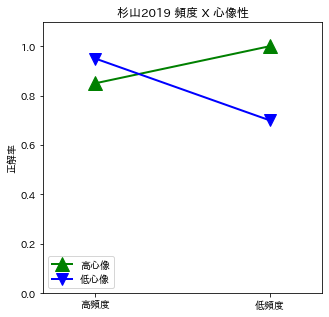

In [22]:
plt.figure(figsize=(5,5))
plt.plot([17/20, 20/20], 'g^-', label='高心像', linewidth=2, markersize=14)
plt.plot([19/20, 14/20], 'bv-', label='低心像', linewidth=2, markersize=12)
plt.xlim(-0.3, 1.3)
plt.ylim(0,1.1)
plt.ylabel('正解率')
plt.xticks([0, 1], [ "高頻度", "低頻度"])
plt.legend(loc="lower left")
plt.title('杉山2019 頻度 X 心像性')
plt.savefig('2019Sugiyama_freqXimag.pdf')
plt.show()

# 4 '1000stimulus-proponly-New2_2022.xls'

In [23]:
if isColab:
    from google.colab import files
    uploaded = files.upload()

Saving 1000stimulus-proponly-New2_2022.xls to 1000stimulus-proponly-New2_2022.xls


In [ ]:
kondo_pd = pd.read_excel('1000stimulus-proponly-New2_2022.xls', sheet_name='data')
kondo_word1list = kondo_pd['kanji1'].to_list()
kondo_word2list = kondo_pd['kanji2'].to_list()
for i, (_1, _2) in enumerate(zip(kondo_word1list, kondo_word2list)):
    wrd = _1+_2
    output = eval_input_seq2seq(encoder=encoder, decoder=decoder, ds=ds, inp_wrd=wrd, isPrint=False)
    print(f'{i+1:04d} {wrd}->/{"".join(_p for _p in output[0][:-1])}/')
    #print(_1+_2)

In [ ]:
import jaconv
from termcolor import colored

yomi = []
for k in kondo_pd[['yomi1', 'yomi2']].iterrows():
    _yomi = k[1][0]+k[1][1]
    _hira = jaconv.kata2hira(_yomi)
    _juli = "".join(_p for _p in jaconv.hiragana2julius(_hira).split())
    yomi.append((_yomi, _juli))

counter = 0
outputs = {}
for i, (_1, _2, _yomi) in enumerate(zip(kondo_word1list, kondo_word2list, yomi)):
    wrd = _1+_2
    _output = eval_input_seq2seq(encoder=encoder, decoder=decoder, ds=ds, inp_wrd=wrd, isPrint=False)
    _outp = "".join(_p for _p in _output[0][:-1])
    color = 'red' if _outp!=_yomi[1] else 'blue'
    if _outp == _yomi[1]:
        counter += 1

    outputs[i] = {'wrd':wrd, 
                 'output': "".join(_p for _p in _outp), 
                 'teach': _yomi, 
                 'yes/no':_outp==_yomi[1]}
    #print(f'{i+1:04d} {wrd} /{colored("".join(_p for _p in _outp),color)}/')

print(f'正解率 {counter:4d}/{len(kondo_word1list):4d}={counter/len(kondo_word1list) * 100:6.3f}%')

In [ ]:
print(f'正解率 {counter:4d}/{len(kondo_word1list):4d}={counter/len(kondo_word1list) * 100:6.3f}%')
counter = 0
for k, v in outputs.items():
    if v['yes/no'] == False:
        print(f"{k+1:4d} {v['wrd']} /{v['output']}/ ({v['teach'][1]}) {v['yes/no']}")
        counter += 1
print(f'counter:{counter}')    

# TLPA と SALA で評価

In [ ]:
import json
json_fname = 'RAM//2022_0508SALA_TLPA.json'
if os.path.exists(json_fname):
    with open(json_fname, 'r', encoding='utf-8') as f:
        TLPA1, TLPA2, TLPA3, TLPA4, SALA_R29, SALA_R30, SALA_R31 = json.load(f)


tlpa1 = {k:{'word':v[0], 'cond':v[1]} for k, v in TLPA1.items()}
tlpa2 = {k:{'word':v[0], 'note':v[1]} for k, v in TLPA2.items()}
tlpa3 = {k:{'word':v[0], 'note':v[1]} for k, v in TLPA3.items()}
tlpa4 = {k:{'word':v[0], 'note':v[1]} for k, v in TLPA4.items()}
sala_r29 = {k:{'word':v[0], 'cond':v[1]} for k, v in SALA_R29.items()}
sala_r30 = {k:{'word':v[0], 'cond':v[1:]} for k, v in SALA_R30.items()}
sala_r31 = {k:{'word':v[0], 'cond':v[1]} for k, v in SALA_R31.items()}

cr_every=5
for _dict in [tlpa1, tlpa2, tlpa3, tlpa4, sala_r29, sala_r30, sala_r31]:
    print('-' * 77)
    for i, wrd in enumerate([v['word'] for k, v in _dict.items()]):
        _end = '\n' if ((i+1) % cr_every) == 0 else ', '
        wrd_ids = ds.source_tkn2ids(wrd)
        ans = eval_input_seq2seq(encoder=encoder, decoder=decoder, ds=ds, inp_wrd=wrd, isPrint=False)
        print(f'{i:03d}:{wrd}->/{"".join(ch for ch in ans[0][:-1])}/', end=_end) #, ans[1])
    if ((i+1) % cr_every) != 0:
        print()

#help(eval_input_seq2seq)